In [1]:
# dependecies and set up
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
cd C:\Users\rebec\OneDrive\Documents\Resources

[WinError 3] The system cannot find the path specified: 'C:\\Users\\rebec\\OneDrive\\Documents\\Resources'
C:\Users\abebe\Documents\George Mason University\CS-504-004 (Fall 2021)\Project\World-happiness-


In [3]:
#file = "Resources/world-happiness-report.csv"

file = "world-happiness-report.csv"
df = pd.read_csv(file)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'world-happiness-report.csv'

In [ ]:
df.isnull().sum()

In [9]:
df.rename({'Country name': 'Country', 'Life Ladder':'Ladder score', 'Log GDP per capita': 'GDP', 'Healthy life expectancy at birth': 'Life expectancy', 
          'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'corruption'}, axis=1, inplace=True)
df.head()

,Country,year,Ladder score,GDP,Social support,Life expectancy,Freedom,Generosity,corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [10]:
 df.drop(columns=['Positive affect', 'Negative affect'], axis=1, inplace=True)


In [11]:
print(df.shape)
print(df.columns)

(1949, 9)
Index(['Country', 'year', 'Ladder score', 'GDP', 'Social support',
       'Life expectancy', 'Freedom', 'Generosity', 'corruption'],
      dtype='object')


In [12]:
for col in df.columns:
    print(col, df[col].nunique(), len(df))

Country 166 1949
year 16 1949
Ladder score 1553 1949
GDP 1500 1949
Social support 455 1949
Life expectancy 828 1949
Freedom 535 1949
Generosity 609 1949
corruption 572 1949


In [13]:
for var in df.columns:
    if df[var].isnull().sum()/len(df) > 0:
        print(var, df[var].isnull().mean().round(3))


GDP 0.018
Social support 0.007
Life expectancy 0.028
Freedom 0.016
Generosity 0.046
corruption 0.056


In [14]:
df.isnull().sum()

Country              0
year                 0
Ladder score         0
GDP                 36
Social support      13
Life expectancy     55
Freedom             32
Generosity          89
corruption         110
dtype: int64

In [15]:
data = df.loc[(df['year']>=2018)]
data.shape

(381, 9)

In [16]:
df.tail()

,Country,year,Ladder score,GDP,Social support,Life expectancy,Freedom,Generosity,corruption
1944,Zimbabwe,2016,3.735,7.984,0.768,54.4,0.733,-0.095,0.724
1945,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831
1948,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789


In [17]:
df.isnull().sum()

Country              0
year                 0
Ladder score         0
GDP                 36
Social support      13
Life expectancy     55
Freedom             32
Generosity          89
corruption         110
dtype: int64

In [18]:
for var in df.columns:
    if df[var].isnull().sum()/len(df) > 0:
        print(var, df[var].isnull().mean().round(3))

GDP 0.018
Social support 0.007
Life expectancy 0.028
Freedom 0.016
Generosity 0.046
corruption 0.056


### --------------------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
#df1 = pd.read_csv("Resources/world-happiness-report-2021.csv")
#df1.head()

df1 = pd.read_csv("world-happiness-report-2021.csv")
df1.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [20]:
df1.isnull().sum().head()

Country name                      0
Regional indicator                0
Ladder score                      0
Standard error of ladder score    0
upperwhisker                      0
dtype: int64

In [21]:
df1.shape

(149, 20)

In [22]:
df1.drop(columns=['upperwhisker','Regional indicator', 'lowerwhisker','Explained by: Log GDP per capita', 'Explained by: Social support',
                  'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 
                  'Explained by: Freedom to make life choices', 'Explained by: Freedom to make life choices',
                  'Standard error of ladder score',
                  'Explained by: Generosity', 'Explained by: Generosity', 'Explained by: Perceptions of corruption',
                  'Dystopia + residual', 'Ladder score in Dystopia'], axis=1, inplace=True)

In [23]:
df1.head()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [24]:
df1.rename({'Country name': 'Country', 'Logged GDP per capita': 'GDP', 'Healthy life expectancy': 'Life expectancy', 
          'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'corruption'}, axis=1, inplace=True)
df1.head()

,Country,Ladder score,GDP,Social support,Life expectancy,Freedom,Generosity,corruption
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [25]:
frames = [df, df1]
df2 = pd.concat(frames)
df2['year'] = df2['year'].fillna(2021)
data = df2.set_index('Country')
data.head()

,year,Ladder score,GDP,Social support,Life expectancy,Freedom,Generosity,corruption
Country,,,,,,,,
Afghanistan,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882
Afghanistan,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850
Afghanistan,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707
Afghanistan,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731
Afghanistan,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [26]:
df2.loc[(df2['year']>=2018)].tail()


,Country,year,Ladder score,GDP,Social support,Life expectancy,Freedom,Generosity,corruption
144,Lesotho,2021.0,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,2021.0,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,2021.0,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,2021.0,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,2021.0,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


In [27]:
corr_df = df2[['Ladder score','GDP', 'Social support', 'Life expectancy', 'Freedom', 'Generosity', 'corruption']]
corr_df.corr().round(2).style.background_gradient(cmap='gray')

,Ladder score,GDP,Social support,Life expectancy,Freedom,Generosity,corruption
Ladder score,1.000000,0.790000,0.710000,0.750000,0.530000,0.180000,-0.430000
GDP,0.790000,1.000000,0.700000,0.850000,0.370000,-0.020000,-0.350000
Social support,0.710000,0.700000,1.000000,0.620000,0.410000,0.050000,-0.220000
Life expectancy,0.750000,0.850000,0.620000,1.000000,0.400000,0.010000,-0.330000
Freedom,0.530000,0.370000,0.410000,0.400000,1.000000,0.320000,-0.480000
Generosity,0.180000,-0.020000,0.050000,0.010000,0.320000,1.000000,-0.280000
corruption,-0.430000,-0.350000,-0.220000,-0.330000,-0.480000,-0.280000,1.000000


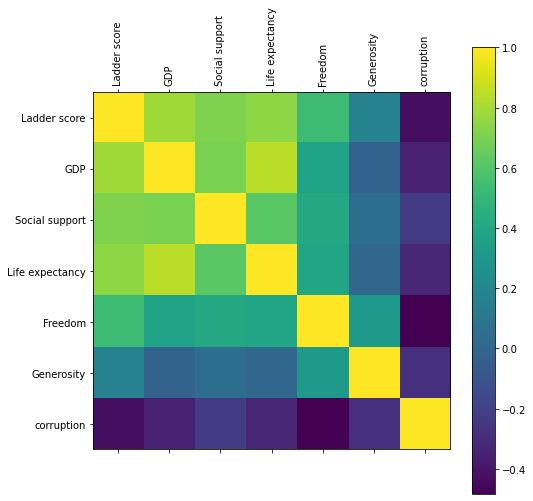

In [28]:
#Calculate the correlation matrix
corr_df = df2[['Ladder score','GDP', 'Social support', 'Life expectancy', 'Freedom', 'Generosity', 'corruption']]
data_corr = corr_df.corr()

#Plot the matrix
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(data_corr)

plt.xticks(range(len(corr_df.columns)), corr_df.columns, rotation=90)
plt.yticks(range(len(corr_df.columns)), corr_df.columns)

plt.colorbar()

plt.show()

In [29]:
df2.shape

(2098, 9)

In [30]:
df2.isnull().sum()

Country              0
year                 0
Ladder score         0
GDP                 36
Social support      13
Life expectancy     55
Freedom             32
Generosity          89
corruption         110
dtype: int64

### Multiple Regression Model

In [31]:
# missing_col = [['GDP', 'Social support', 'Life expectancy', 'Freedom', 'Generosity', 'corruption']]
# for i in missing_col:
# #     df2.loc[df2.loc[:,i].isnull(),i]=df2.loc[:,i].mean()

In [32]:
data = df2.dropna(how='any',axis=0)
data.shape

(1861, 9)

In [33]:
data.isnull().sum()

Country            0
year               0
Ladder score       0
GDP                0
Social support     0
Life expectancy    0
Freedom            0
Generosity         0
corruption         0
dtype: int64

# Random Forrest Regression

In [35]:
#Creating x and y

x=pd.DataFrame(data[['GDP', 'Social support', 'Life expectancy', 'Freedom', 'Generosity', 'corruption']].values)
y=pd.DataFrame(data["Ladder score"].values)
cols = data.drop(columns = 'Ladder score').columns

In [36]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [38]:
#Creating object of Random Forest Regressor Class
rfrmodel = RandomForestRegressor()

#fixing reshape error
y_train = y_train.values.ravel()

#Fitting the data
model = rfrmodel.fit(x_train,y_train)

#test set predictions
predictions_rf = model.predict(x_test)
rmse_rf = mean_squared_error(y_test, predictions_rf, squared = False)
print('\n RMSE: ', rmse_rf)

cross_val = cross_val_score(model, x_train, y_train)
print('\n Cross Validation Score: ')
print(list(zip(cols, cross_val)))

r2_rf = model.score(x_test, y_test)
print('\n R^2 Value: ', r2_rf)


 RMSE:  0.4681204438059882

 Cross Validation Score: 
[('Country', 0.8349783944044527), ('year', 0.8680753867734002), ('GDP', 0.8657561528933552), ('Social support', 0.8484919778766117), ('Life expectancy', 0.8621441114060168)]

 R^2 Value:  0.8229577136031092


In [39]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [40]:
#Creating 6 models to look at Ladder Score vs the six factors

In [41]:
A=data['GDP'].values
a=data["Ladder score"].values

A_train, A_test, a_train, a_test=train_test_split(A, a, test_size=.20)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

A_train = A_train.reshape(-1,1)
a_train = a_train.reshape(-1,1).ravel()
regressor.fit(A_train, a_train)

a_pred = regressor.predict(A_test.reshape(-1,1))


B=data['Social support'].values
b=data["Ladder score"].values

B_train, B_test, b_train, b_test=train_test_split(B, b, test_size=.20)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

B_train = B_train.reshape(-1,1)
b_train = b_train.reshape(-1,1).ravel()
regressor.fit(B_train, b_train)

b_pred = regressor.predict(B_test.reshape(-1,1))


C=data['Life expectancy'].values
c=data["Ladder score"].values

C_train, C_test, c_train, c_test=train_test_split(C, c, test_size=.20)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

C_train = C_train.reshape(-1,1)
c_train = c_train.reshape(-1,1).ravel()
regressor.fit(C_train, c_train)

c_pred = regressor.predict(C_test.reshape(-1,1))


D=data['Freedom'].values
d=data["Ladder score"].values

D_train, D_test, d_train, d_test=train_test_split(D, d, test_size=.20)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

D_train = D_train.reshape(-1,1)
d_train = d_train.reshape(-1,1).ravel()
regressor.fit(D_train, d_train)

d_pred = regressor.predict(D_test.reshape(-1,1))


E=data['Generosity'].values
e=data["Ladder score"].values

E_train, E_test, e_train, e_test=train_test_split(E, e, test_size=.20)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

E_train = E_train.reshape(-1,1)
e_train = e_train.reshape(-1,1).ravel()
regressor.fit(E_train, e_train)

e_pred = regressor.predict(E_test.reshape(-1,1))


F=data['corruption'].values
f=data["Ladder score"].values

F_train, F_test, f_train, f_test=train_test_split(F, f, test_size=.20)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

F_train = F_train.reshape(-1,1)
f_train = f_train.reshape(-1,1).ravel()
regressor.fit(F_train, f_train)

f_pred = regressor.predict(F_test.reshape(-1,1))


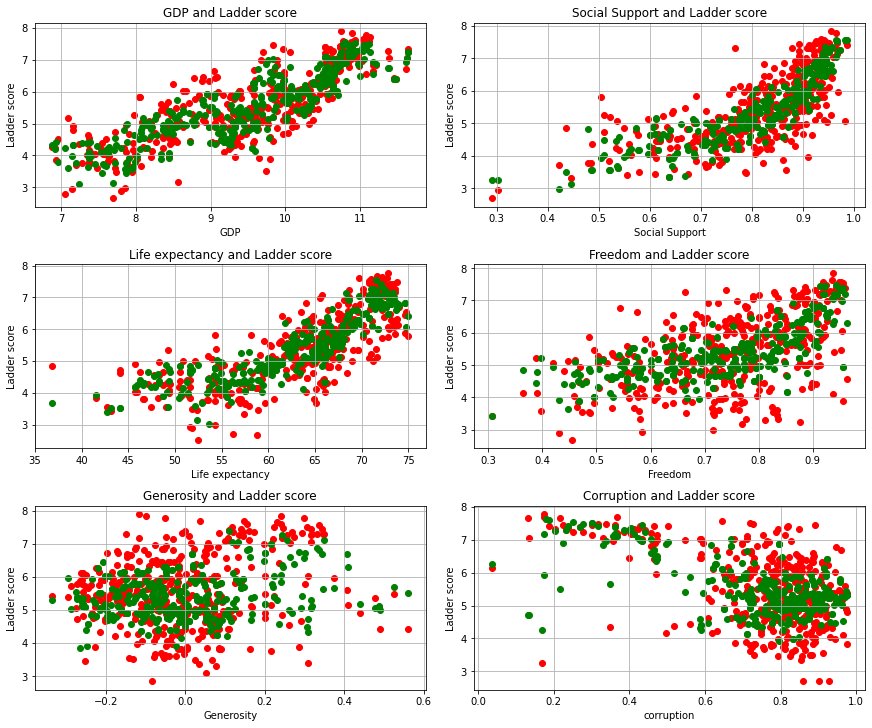

In [47]:
#Plotting scatter plots Red = real values, Green = predicted

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6) ) = plt.subplots(3, 2, figsize=(12, 10), constrained_layout=True)

# plot 1st one 
ax1.grid()
ax1.scatter(A_test, a_test, color = 'red')
ax1.scatter(A_test, a_pred, color='green')
ax1.set_ylabel('Ladder score', fontsize=10)
ax1.set_xlabel('GDP', fontsize=10)
ax1.title.set_text('GDP and Ladder score')

# plot 2nd one 
ax2.grid()
ax2.scatter(B_test, b_test, color = 'red')
ax2.scatter(B_test, b_pred, color='green')
ax2.set_ylabel('Ladder score', fontsize=10)
ax2.set_xlabel('Social Support', fontsize=10)
ax2.title.set_text('Social Support and Ladder score')

# plot 3rd one 
ax3.grid()
ax3.scatter(C_test, c_test, color = 'red')
ax3.scatter(C_test, c_pred, color='green')
ax3.set_ylabel('Ladder score', fontsize=10)
ax3.set_xlabel('Life expectancy', fontsize=10)
ax3.title.set_text('Life expectancy and Ladder score')

# plot 4th one 
ax4.grid()
ax4.scatter(D_test, d_test, color = 'red')
ax4.scatter(D_test, d_pred, color='green')
ax4.set_ylabel('Ladder score', fontsize=10)
ax4.set_xlabel('Freedom', fontsize=10)
ax4.title.set_text('Freedom and Ladder score')

# plot 5th one 
ax5.grid()
ax5.scatter(E_test, e_test, color = 'red')
ax5.scatter(E_test, e_pred, color='green')
ax5.set_ylabel('Ladder score', fontsize=10)
ax5.set_xlabel('Generosity', fontsize=10)
ax5.title.set_text('Generosity and Ladder score')

# plot 6th one 
ax6.grid()
ax6.scatter(F_test, f_test, color = 'red')
ax6.scatter(F_test, f_pred, color='green')
ax6.set_ylabel('Ladder score', fontsize=10)
ax6.set_xlabel('corruption', fontsize=10)
ax6.title.set_text('Corruption and Ladder score')

Text(0.5, 1.0, 'GDP vs Ladder score')

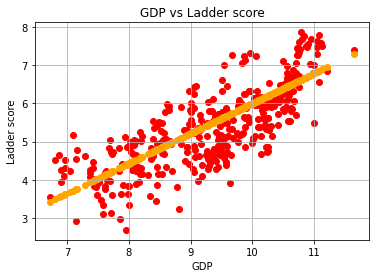

In [48]:
x=data['GDP'].values
y=data['Ladder score'].values

LR = LinearRegression()

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20)

# fitting the training data
LR.fit(x_train.reshape(-1,1),y_train.reshape(-1,1).ravel())

regr = linear_model.LinearRegression()
#regr.fit(x, y)

y_pred = LR.predict(x_test.reshape(-1,1))

plt.grid()
plt.scatter(x_test, y_test, color = 'red')
plt.scatter(x_test, y_pred, c='orange', marker='o')
plt.ylabel('Ladder score', fontsize=10)
plt.xlabel('GDP', fontsize=10)
plt.title('GDP vs Ladder score')



Text(0.5, 1.0, 'Social vs Ladder score')

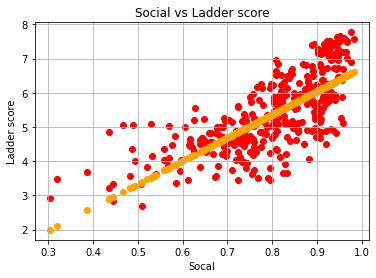

In [49]:
N=data['Social support'].values
n=data['Ladder score'].values

LR = LinearRegression()

N_train, N_test, n_train, n_test=train_test_split(N, n, test_size=.20)

# fitting the training data
LR.fit(N_train.reshape(-1,1),n_train.reshape(-1,1).ravel())

regr = linear_model.LinearRegression()
#regr.fit(x, y)

n_pred = LR.predict(N_test.reshape(-1,1))

plt.grid()
plt.scatter(N_test, n_test, color = 'red')
plt.scatter(N_test, n_pred, c='orange', marker='o')
plt.ylabel('Ladder score', fontsize=10)
plt.xlabel('Socal', fontsize=10)
plt.title('Social vs Ladder score')

